In [83]:
!pip list | grep tensorflow

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)


In [67]:
!pip install tensorflow==2.13.0

  Obtaining dependency information for tensorflow==2.13.0 from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [63]:
!pip install lxml

In [3]:
import random
import matplotlib.pyplot as plt
import cv2
from glob import glob
import os
import pandas as pd

%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.13.0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten ,BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Input,Activation
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras import regularizers , initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras
from tensorflow.keras.initializers import glorot_uniform

#import tensorflow as tf 

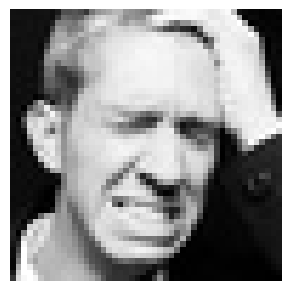

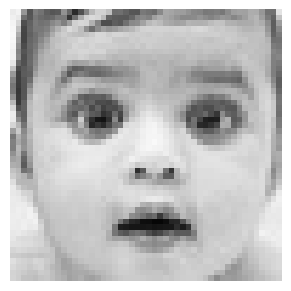

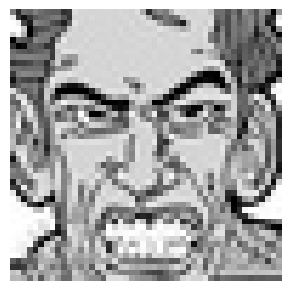

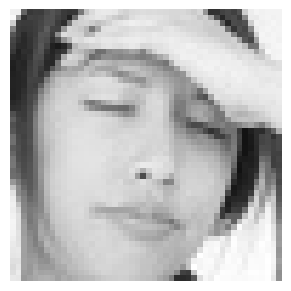

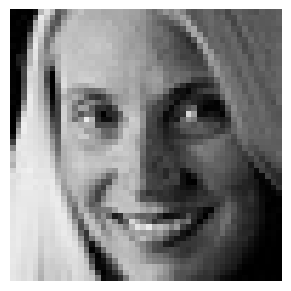

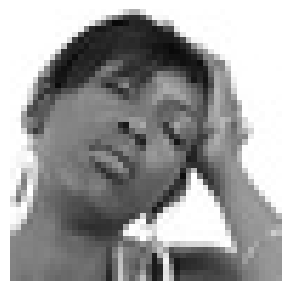

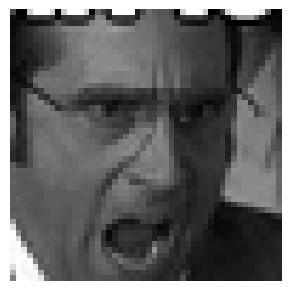

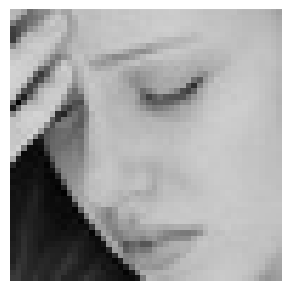

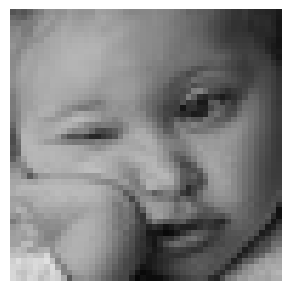

In [7]:
images=glob("train/**/**")
for i in range(9):
    image=random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+1)
    plt.imshow(cv2.imread(image));plt.axis('off')

In [8]:
datagen_train=ImageDataGenerator()
train_generator = datagen_train.flow_from_directory(
    "train/",
    target_size=(48 ,48),
    batch_size=32,
    color_mode = "grayscale",
    class_mode='categorical',
    shuffle=True,
    )
datagen_test=ImageDataGenerator()
validation_generator=datagen_test.flow_from_directory(
    "test/",
    target_size=(48 ,48),
    batch_size=32,
    color_mode = "grayscale",
    class_mode='categorical',
    shuffle=True,
    )

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
def convolution(input_tensor,filters,kernal_size):
    x=Conv2D(filters=filters,kernel_size=kernal_size,padding='same')(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x=MaxPooling2D(pool_size=(2,2))(x)
    x=Dropout(0.25)(x)
    return x
    


In [10]:
def dens_f(input_tensor,nodes):
    x=Dense(nodes)(input_tensor)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    #x=MaxPooling2D(pool_size=(2,2),padding='same', data_format='channels_last',strides=(1, 1))(x)
    x=Dropout(0.25)(x)
  
    return x
       

In [11]:
def model_for(input_shape):
    inputs = Input(input_shape)
    conv1 = convolution(inputs, 32, (3, 3))
    conv2 = convolution(inputs, 64, (5, 5))
    conv3 = convolution(inputs, 128, (3, 3))
    flatten = Flatten()(conv3)
    dense1 = dens_f(flatten, 256)
    output = Dense(7, activation="softmax",kernel_initializer="uniform")(dense1)
    model = Model(inputs=[inputs], outputs=[output])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
model=model_for((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0     

In [13]:
epochs=15
steps_per_epoch=train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size
checkpoint=ModelCheckpoint('model_weights.h5',monitor='val_accuracy',save_weights_only=True,mode='max',verbose=1)
callbacks=[checkpoint]

#Training the model

In [14]:
history=model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks)

Epoch 1/15
897/897 [==============================] - ETA: 0s - loss: 1.5476 - accuracy: 0.3950
Epoch 1: saving model to model_weights.h5
897/897 [==============================] - 782s 870ms/step - loss: 1.5476 - accuracy: 0.3950 - val_loss: 1.6009 - val_accuracy: 0.3541
Epoch 2/15
897/897 [==============================] - ETA: 0s - loss: 1.3363 - accuracy: 0.4897
Epoch 2: saving model to model_weights.h5
897/897 [==============================] - 723s 806ms/step - loss: 1.3363 - accuracy: 0.4897 - val_loss: 1.4139 - val_accuracy: 0.4643
Epoch 3/15
897/897 [==============================] - ETA: 0s - loss: 1.2058 - accuracy: 0.5481
Epoch 3: saving model to model_weights.h5
897/897 [==============================] - 707s 789ms/step - loss: 1.2058 - accuracy: 0.5481 - val_loss: 1.6082 - val_accuracy: 0.3913
Epoch 4/15
897/897 [==============================] - ETA: 0s - loss: 1.0769 - accuracy: 0.5999
Epoch 4: saving model to model_weights.h5
897/897 [==============================] - 

In [15]:
model.evaluate(validation_generator)

225/225 [==============================] - 25s 108ms/step - loss: 1.9492 - accuracy: 0.4844


[1.9492474794387817, 0.484396755695343]

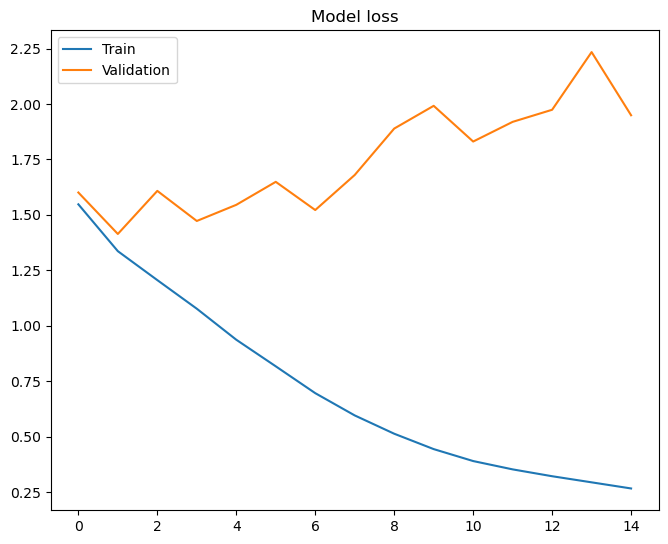

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

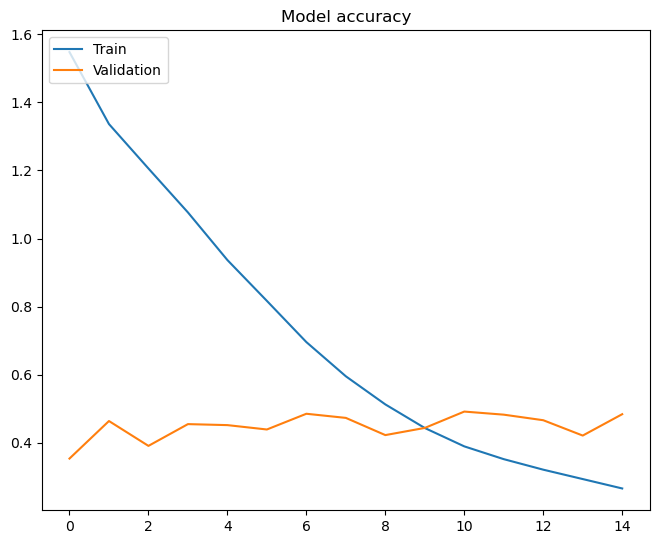

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [18]:
model_json=model.to_json()
with open ("model_a.json","w") as json_file:
    json_file.write(model_json)